# **NBA PTS Prediction ML Model**

## **Load Data**

In [5]:
import pandas as pd


nba_data = pd.read_csv('/content/drive/MyDrive/NBADATASET/playerstats.csv',sep =";", encoding='latin-1')
columns_to_drop = ['Player', 'Pos', 'Tm']
nba_data_new = nba_data.drop(columns = columns_to_drop)
nba_data_new



,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,24,16,0,18.1,3.3,7.0,0.464,0.6,1.9,...,0.560,2.3,3.9,6.2,1.9,0.6,0.4,1.4,1.8,8.0
1,2,26,16,16,33.6,8.3,15.8,0.522,0.1,0.2,...,0.813,2.1,7.9,9.9,3.9,1.2,1.0,2.4,2.4,22.3
2,3,23,22,9,20.4,2.4,5.2,0.465,1.3,3.2,...,0.750,0.8,1.7,2.5,1.0,0.6,0.5,0.7,1.5,6.4
3,4,23,15,4,26.9,5.1,11.7,0.438,1.7,5.3,...,0.621,1.7,4.6,6.3,2.3,0.7,0.7,1.1,1.7,13.1
4,5,25,21,10,23.9,2.6,6.4,0.410,1.5,4.2,...,0.538,0.5,1.7,2.1,2.5,0.9,0.7,1.1,1.9,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,490,35,3,0,3.3,0.7,1.3,0.500,0.0,0.0,...,0.000,0.3,0.7,1.0,1.0,0.0,0.0,0.3,0.0,1.3
502,491,25,19,19,36.1,8.3,20.1,0.412,3.1,8.7,...,0.868,0.7,2.1,2.8,10.6,1.5,0.1,3.8,1.5,27.2
503,492,25,15,6,12.7,2.1,3.9,0.552,0.2,0.9,...,0.750,1.6,3.4,5.0,0.8,0.2,0.5,0.9,1.7,4.9
504,493,31,19,0,9.7,0.5,1.7,0.303,0.0,0.1,...,0.542,1.2,1.8,3.0,1.0,0.2,0.1,0.3,1.2,1.7


##**Data Preparation**

###Data Separation as X and Y

In [6]:
y = nba_data_new['PTS']
y

0       8.0
1      22.3
2       6.4
3      13.1
4       7.0
       ... 
501     1.3
502    27.2
503     4.9
504     1.7
505    12.0
Name: PTS, Length: 506, dtype: float64

In [7]:
x = nba_data_new.drop('PTS', axis=1)
x

,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF
0,1,24,16,0,18.1,3.3,7.0,0.464,0.6,1.9,...,1.6,0.560,2.3,3.9,6.2,1.9,0.6,0.4,1.4,1.8
1,2,26,16,16,33.6,8.3,15.8,0.522,0.1,0.2,...,7.0,0.813,2.1,7.9,9.9,3.9,1.2,1.0,2.4,2.4
2,3,23,22,9,20.4,2.4,5.2,0.465,1.3,3.2,...,0.4,0.750,0.8,1.7,2.5,1.0,0.6,0.5,0.7,1.5
3,4,23,15,4,26.9,5.1,11.7,0.438,1.7,5.3,...,1.9,0.621,1.7,4.6,6.3,2.3,0.7,0.7,1.1,1.7
4,5,25,21,10,23.9,2.6,6.4,0.410,1.5,4.2,...,0.6,0.538,0.5,1.7,2.1,2.5,0.9,0.7,1.1,1.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,490,35,3,0,3.3,0.7,1.3,0.500,0.0,0.0,...,0.7,0.000,0.3,0.7,1.0,1.0,0.0,0.0,0.3,0.0
502,491,25,19,19,36.1,8.3,20.1,0.412,3.1,8.7,...,8.8,0.868,0.7,2.1,2.8,10.6,1.5,0.1,3.8,1.5
503,492,25,15,6,12.7,2.1,3.9,0.552,0.2,0.9,...,0.5,0.750,1.6,3.4,5.0,0.8,0.2,0.5,0.9,1.7
504,493,31,19,0,9.7,0.5,1.7,0.303,0.0,0.1,...,1.3,0.542,1.2,1.8,3.0,1.0,0.2,0.1,0.3,1.2


###Data Splitting

In [8]:
from sklearn.model_selection import train_test_split



x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 100)



,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF
379,372,30,19,4,27.9,3.9,8.5,0.463,1.4,4.3,...,1.5,0.897,0.5,2.1,2.6,3.0,0.6,0.3,1.2,1.9
311,306,27,17,17,35.6,9.5,20.9,0.455,3.0,8.4,...,6.4,0.870,1.1,4.8,5.9,5.3,1.9,0.4,2.8,1.9
157,154,28,3,0,12.0,0.7,2.3,0.286,0.0,1.3,...,1.7,0.800,0.3,0.3,0.7,3.7,0.7,0.3,0.7,0.7
244,241,27,17,2,17.8,1.2,3.4,0.368,0.6,1.9,...,0.4,0.667,1.1,3.0,4.1,1.4,0.7,0.7,0.4,1.0
56,55,22,23,0,20.3,3.4,7.1,0.476,0.6,1.6,...,1.6,0.730,0.9,3.2,4.1,1.9,0.4,0.3,0.7,1.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,338,28,21,1,19.6,3.0,6.7,0.454,1.4,3.8,...,0.8,0.688,0.5,1.8,2.3,1.7,0.5,0.2,0.6,1.7
359,352,25,23,23,32.0,6.8,13.7,0.494,3.0,7.4,...,1.4,0.750,1.7,6.4,8.1,1.6,0.5,0.9,1.3,2.3
323,318,23,12,0,10.7,0.8,2.5,0.333,0.5,1.6,...,0.4,0.600,0.4,1.1,1.5,0.3,0.7,0.1,0.1,0.8
280,277,23,11,0,7.7,0.7,2.0,0.364,0.1,0.5,...,0.5,0.500,0.3,0.8,1.1,0.4,0.5,0.1,0.5,1.3


##**Model Building**

###**Linear Regression**

In [12]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(x_train,y_train)

LinearRegression()

####**Applying the Model to make a Prediction**

In [14]:
y_linreg_train_pred = linreg.predict(x_train)
y_linreg_test_pred = linreg.predict(x_test)

y_linreg_test_pred

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([ 2.79754120e+00,  3.09003293e+00,  2.72926363e+01,  5.69859579e+00,
        8.37785865e+00,  2.68230183e+01,  3.82593848e+00,  1.47563993e+01,
        2.00997560e+00,  3.95896987e+00,  7.90612274e+00,  1.66269310e+01,
        3.27707251e+00,  1.64642709e+00,  1.39932600e+00,  8.73396438e-01,
        2.98139395e+00,  4.76869769e+00,  1.70339116e+01,  5.93570878e+00,
        2.57063650e+01,  1.43239767e+01,  5.85425186e+00,  1.10755708e+01,
        1.58204248e+01,  9.17476498e-01,  8.87773892e-01,  1.91576486e+01,
        7.47576564e+00,  3.71815824e+00,  7.27506360e+00,  9.03703683e-01,
        1.41595448e+01,  1.99720526e+01,  5.79352529e+00,  1.31369295e+01,
        6.59170613e+00,  1.22021513e+01,  3.39362623e+00,  5.40524846e+00,
        1.29837043e+01,  1.40849357e+00,  7.32970325e+00,  1.09663361e+01,
        1.15824226e-02,  9.82793433e-01,  1.78889752e+01,  3.05006864e+01,
        1.46732937e+01,  1.66507292e+01,  2.23970494e+01,  4.53226796e+00,
        2.72610355e+01,  

In [15]:
y_linreg_train_pred

array([ 1.05958990e+01,  2.75043339e+01,  2.71254081e+00,  3.24733385e+00,
        8.60044869e+00,  2.38493785e+00,  1.27892816e+01,  9.95864984e+00,
        3.49951213e+00,  1.14948772e+01,  7.91414409e+00,  1.01339412e+01,
        5.41034158e+00,  1.99337282e+00,  8.01468052e+00,  3.41123541e+00,
        7.50816101e+00,  1.23088386e+01,  1.30821303e+01,  2.40562447e+00,
        1.26061097e+01,  1.73519134e+01,  2.94684829e+01,  1.94875302e+01,
        3.46357851e+00,  6.50139990e+00,  1.31789789e+00, -2.19683975e-02,
        1.08512228e+00, -2.21030416e-03,  8.83176535e+00,  1.91036430e+01,
        2.50126433e+01,  4.68767275e+00,  2.21768445e+01,  1.99702720e+01,
        1.56503756e+01,  8.68156092e+00,  2.72521570e+00,  5.57448779e+00,
        5.89483879e+00,  1.52884799e+01,  2.35789933e+00,  3.49208293e+00,
        2.14126397e+01,  4.20947367e+00,  2.44827395e+01,  6.04796185e-01,
        2.18050270e+01,  9.86072007e-01,  2.06004744e+01,  2.18341577e+01,
        1.16286283e+01,  

####**Evaluate Model Performance**

In [16]:
y_train

379    10.7
311    27.6
157     2.7
244     3.4
56      8.6
       ... 
343     8.0
359    17.6
323     2.4
280     1.8
8       7.2
Name: PTS, Length: 404, dtype: float64

In [17]:
y_linreg_train_pred

array([ 1.05958990e+01,  2.75043339e+01,  2.71254081e+00,  3.24733385e+00,
        8.60044869e+00,  2.38493785e+00,  1.27892816e+01,  9.95864984e+00,
        3.49951213e+00,  1.14948772e+01,  7.91414409e+00,  1.01339412e+01,
        5.41034158e+00,  1.99337282e+00,  8.01468052e+00,  3.41123541e+00,
        7.50816101e+00,  1.23088386e+01,  1.30821303e+01,  2.40562447e+00,
        1.26061097e+01,  1.73519134e+01,  2.94684829e+01,  1.94875302e+01,
        3.46357851e+00,  6.50139990e+00,  1.31789789e+00, -2.19683975e-02,
        1.08512228e+00, -2.21030416e-03,  8.83176535e+00,  1.91036430e+01,
        2.50126433e+01,  4.68767275e+00,  2.21768445e+01,  1.99702720e+01,
        1.56503756e+01,  8.68156092e+00,  2.72521570e+00,  5.57448779e+00,
        5.89483879e+00,  1.52884799e+01,  2.35789933e+00,  3.49208293e+00,
        2.14126397e+01,  4.20947367e+00,  2.44827395e+01,  6.04796185e-01,
        2.18050270e+01,  9.86072007e-01,  2.06004744e+01,  2.18341577e+01,
        1.16286283e+01,  

In [23]:
from sklearn.metrics import mean_squared_error,r2_score

linreg_train_mse = mean_squared_error(y_train,y_linreg_train_pred)
linreg_train_r2 = r2_score(y_train,y_linreg_train_pred)

linreg_test_mse = mean_squared_error(y_test,y_linreg_test_pred)
linreg_test_r2 = r2_score(y_test,y_linreg_test_pred)


In [29]:
print('LR MSE (Train): ',linreg_train_mse )
print('LR MSE (Test): ',linreg_test_mse )
print('LR R2 (Train): ',linreg_train_r2)
print('LR R2 (Test): ',linreg_test_r2 )

LR MSE (Train):  0.005340246177060305
LR MSE (Test):  0.004229034172980096
LR R2 (Train):  0.9998882964554016
LR R2 (Test):  0.9999365191877686


In [35]:
linreg_results = pd.DataFrame(['Linear Regression', linreg_train_mse,linreg_train_r2,linreg_test_mse,linreg_test_r2]).transpose()
linreg_results.columns = ['Method', 'Training MSE', 'Training R2','Test MSE', 'Test R2']
linreg_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear Regression,0.00534,0.999888,0.004229,0.999937


###**Random Forest**

In [36]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=2, random_state=100)
rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=2, random_state=100)

####**Applying the Model to make a Prediction**

In [39]:
y_rf_train_pred = rf.predict(x_train)
y_rf_test_pred = rf.predict(x_test)



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


####**Evaluate Model Performance**

In [40]:
from sklearn.metrics import mean_squared_error,r2_score

rf_train_mse = mean_squared_error(y_train,y_rf_train_pred)
rf_train_r2 = r2_score(y_train,y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test,y_rf_test_pred)
rf_test_r2 = r2_score(y_test,y_rf_test_pred)

In [41]:
rf_results = pd.DataFrame(['Random Forest', rf_train_mse,rf_train_r2,rf_test_mse,rf_test_r2]).transpose()
rf_results.columns = ['Method', 'Training MSE', 'Training R2','Test MSE', 'Test R2']
rf_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Random Forest,2.859059,0.940196,2.903913,0.95641


###**Model Comparison**

In [43]:
df_models = pd.concat([linreg_results, rf_results], axis=0).reset_index(drop=True)
df_models

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear Regression,0.00534,0.999888,0.004229,0.999937
1,Random Forest,2.859059,0.940196,2.903913,0.95641


##**Data Visualization**

Text(0.5, 0, 'Actual Pts')

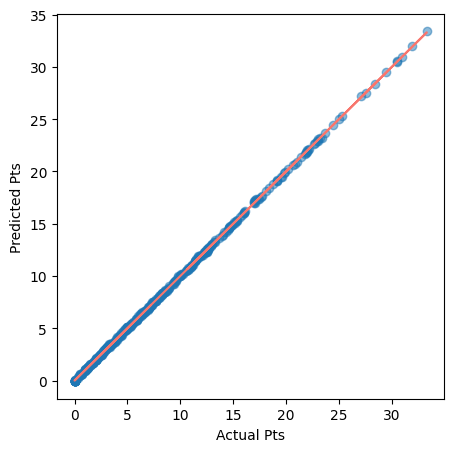

In [48]:
import matplotlib.pyplot as plt
import numpy as np


plt.figure(figsize=(5,5))
plt.scatter(x=y_train, y = y_linreg_train_pred, alpha = 0.5)

z = np.polyfit(y_train,y_linreg_train_pred,1)
p = np.poly1d(z)


plt.plot(y_train, p(y_train), '#F8766D')
plt.ylabel('Predicted Pts')
plt.xlabel('Actual Pts')